Estimated filter order N = 31
Kaiser beta parameter = 3.3953
Actual stopband attenuation: 39.61 dB (Target: 40 dB)
Actual passband ripple: 0.15 dB (Target: 1 dB)


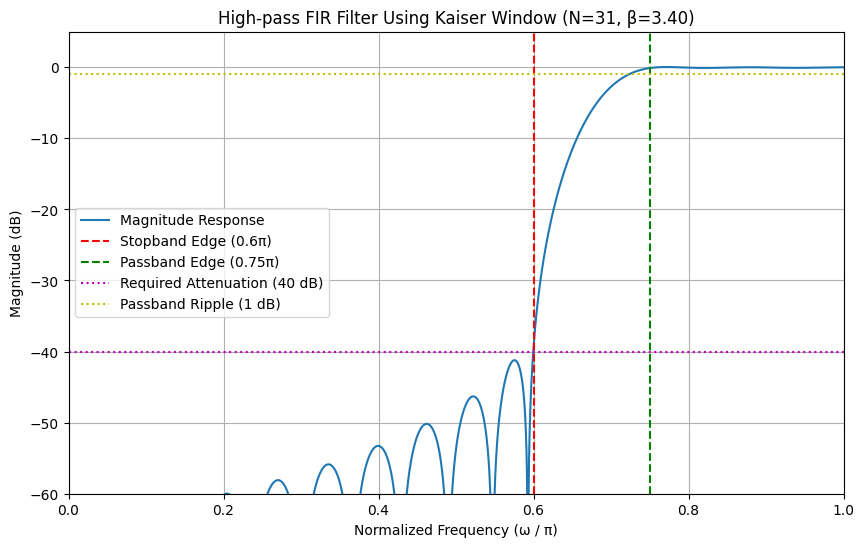

Filter Order (N): 31
First 5 and last 5 coefficients:
[-0.00119597  0.00465465 -0.00434818 -0.00282454  0.01179871  0.01179871
 -0.00282454 -0.00434818  0.00465465 -0.00119597]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin

omega_s = 0.6 * np.pi  
omega_p = 0.75 * np.pi  
A_s = 40  
R_p = 1  

f_s = omega_s / np.pi 
f_p = omega_p / np.pi 
bw = f_p - f_s

if A_s > 50:
    beta = 0.1102 * (A_s - 8.7)
elif A_s > 21:
    beta = 0.5842 * (A_s - 21)**0.4 + 0.07886 * (A_s - 21)
else:
    beta = 0

N = int(np.ceil((A_s - 8) / (2.285 * bw * np.pi)))
if N % 2 == 0:
    N += 1 

print(f"Estimated filter order N = {N}")
print(f"Kaiser beta parameter = {beta:.4f}")

cutoff = (f_s + f_p) / 2  
h = firwin(N, cutoff=cutoff, window=('kaiser', beta), pass_zero=False)

w, H = freqz(h, worN=8000)
mag_db = 20 * np.log10(np.maximum(abs(H), 1e-10))  # Avoid log(0)

stopband_idx = np.where(w <= omega_s)[0]
passband_idx = np.where(w >= omega_p)[0]

if len(stopband_idx) > 0 and len(passband_idx) > 0:
    actual_atten = -np.max(mag_db[stopband_idx])
    passband_mag = mag_db[passband_idx]
    actual_ripple = np.max(passband_mag) - np.min(passband_mag)
    
    print(f"Actual stopband attenuation: {actual_atten:.2f} dB (Target: {A_s} dB)")
    print(f"Actual passband ripple: {actual_ripple:.2f} dB (Target: {R_p} dB)")


plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, mag_db, label="Magnitude Response")
plt.axvline(f_s, color="red", linestyle="--", label="Stopband Edge (0.6π)")
plt.axvline(f_p, color="green", linestyle="--", label="Passband Edge (0.75π)")
plt.axhline(-A_s, color="m", linestyle=":", label=f"Required Attenuation ({A_s} dB)")
plt.axhline(-R_p, color="y", linestyle=":", label=f"Passband Ripple ({R_p} dB)")

plt.title(f"High-pass FIR Filter Using Kaiser Window (N={N}, β={beta:.2f})")
plt.xlabel("Normalized Frequency (ω / π)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-60, 5)
plt.legend()
plt.show()

print(f"Filter Order (N): {N}")
print("First 5 and last 5 coefficients:")
if len(h) > 10:
    print(np.concatenate((h[:5], h[-5:])))
else:
    print(h)

In [6]:
# Increase N by 2 to ensure specifications are met
N += 2
if N % 2 == 0:
    N += 1  # Keep it odd

print(f"Adjusted filter order N = {N}")

# Redesign filter with increased order
h = firwin(N, cutoff=cutoff, window=('kaiser', beta), pass_zero=False)

# Recompute and check
w, H = freqz(h, worN=8000)
mag_db = 20 * np.log10(np.maximum(abs(H), 1e-10))
stopband_idx = np.where(w <= omega_s)[0]
passband_idx = np.where(w >= omega_p)[0]
actual_atten = -np.max(mag_db[stopband_idx])
passband_mag = mag_db[passband_idx]
actual_ripple = np.max(passband_mag) - np.min(passband_mag)

print(f"Updated stopband attenuation: {actual_atten:.2f} dB (Target: {A_s} dB)")
print(f"Updated passband ripple: {actual_ripple:.2f} dB (Target: {R_p} dB)")

Adjusted filter order N = 33
Updated stopband attenuation: 40.44 dB (Target: 40 dB)
Updated passband ripple: 0.14 dB (Target: 1 dB)
